# Exploratory Analysis

Do exploratory data analysis on the three oil futures, focusing on the rate of change / return.

### Imports and Initialization

In [7]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [8]:
COMBINED_DATA = (
    pd.read_csv("../Datasets/Futures_Oil_Combined.csv")
    .loc[:,['Date', 'Change_WTI', 'Change_Brent', 'Change_Dubai']]
    .dropna()
)

COMBINED_DATA['Date'] = pd.to_datetime(COMBINED_DATA['Date'])

COMBINED_DATA

,Date,Change_WTI,Change_Brent,Change_Dubai
3689,2014-04-28,0.0024,-0.0133,0.0000
3690,2014-04-29,0.0044,0.0080,0.0000
3691,2014-04-30,-0.0152,-0.0084,0.0000
3692,2014-05-01,-0.0032,-0.0029,0.0000
3693,2014-05-02,0.0034,0.0077,0.0000
...,...,...,...,...
6477,2024-11-22,0.0163,0.0117,0.0032
6478,2024-11-25,-0.0323,-0.0217,-0.0064
6479,2024-11-26,-0.0025,-0.0027,0.0000
6480,2024-11-27,-0.0007,0.0003,0.0000


### Plot Time Series

Plot the time series of each oil future data.

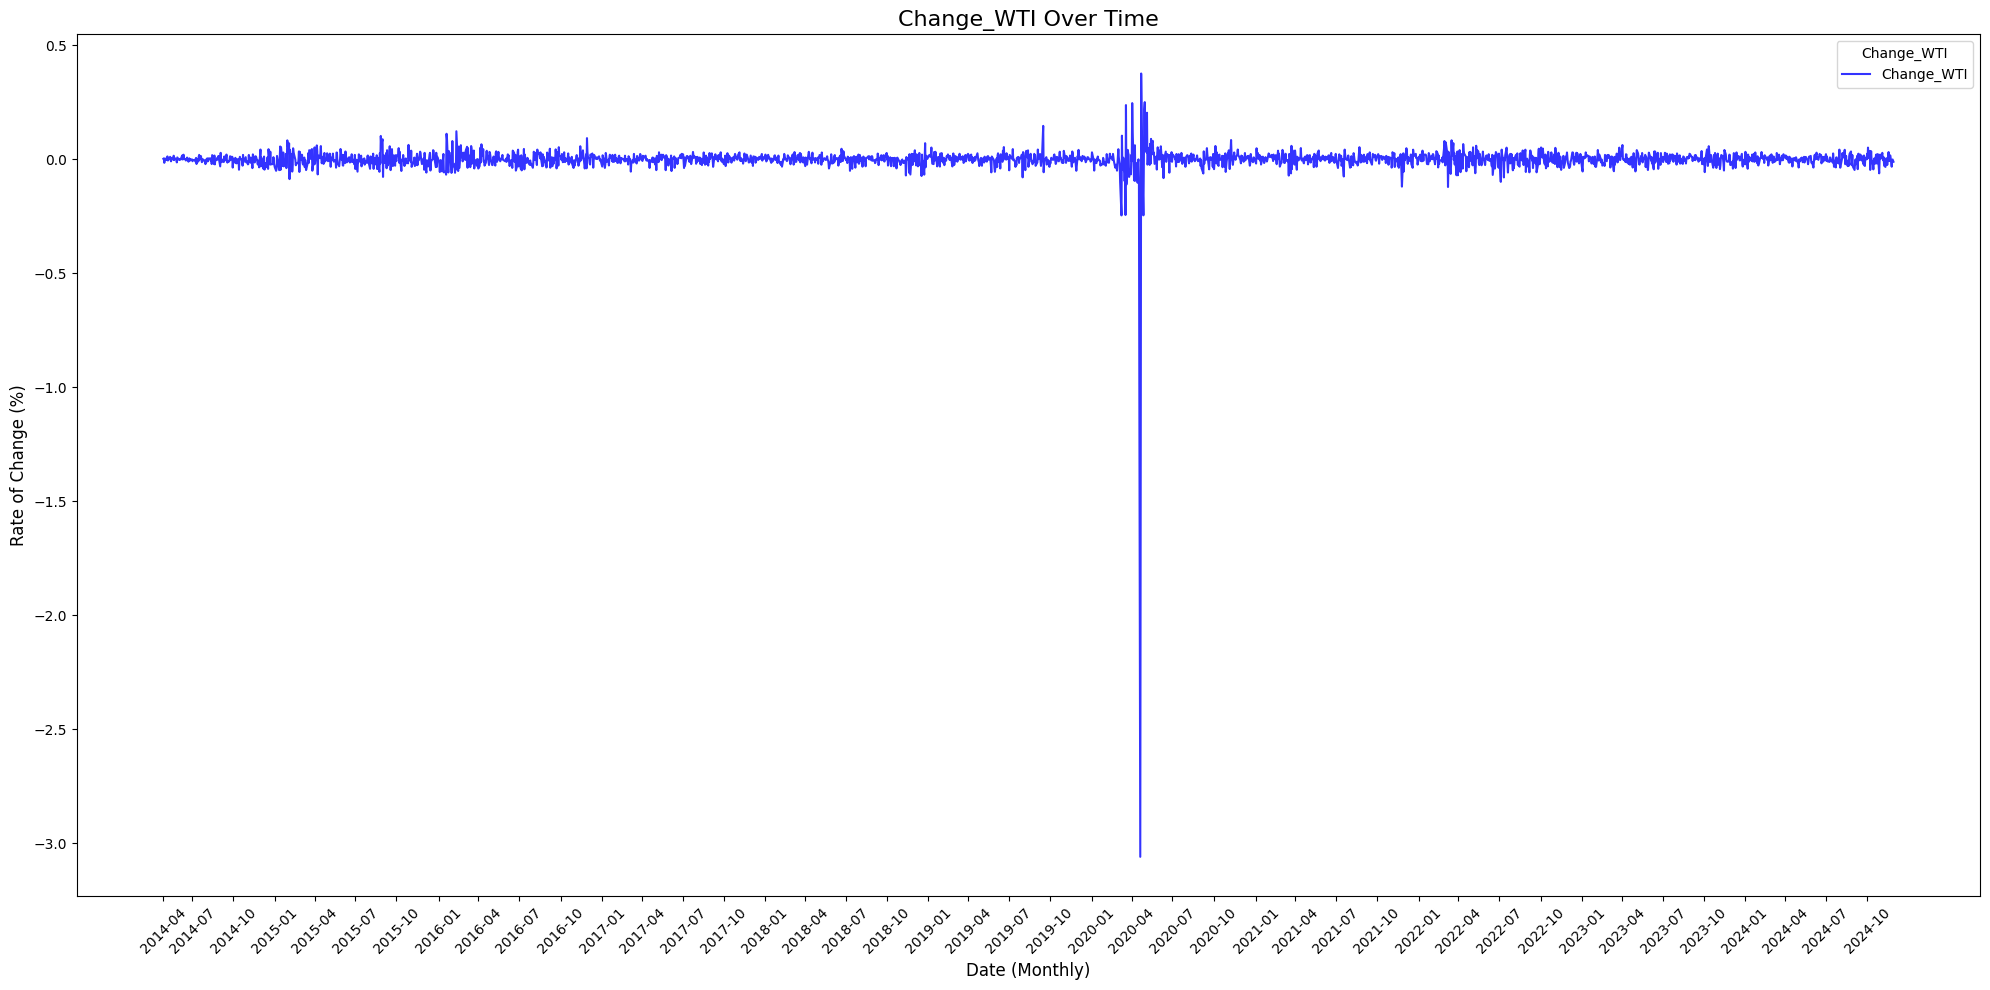

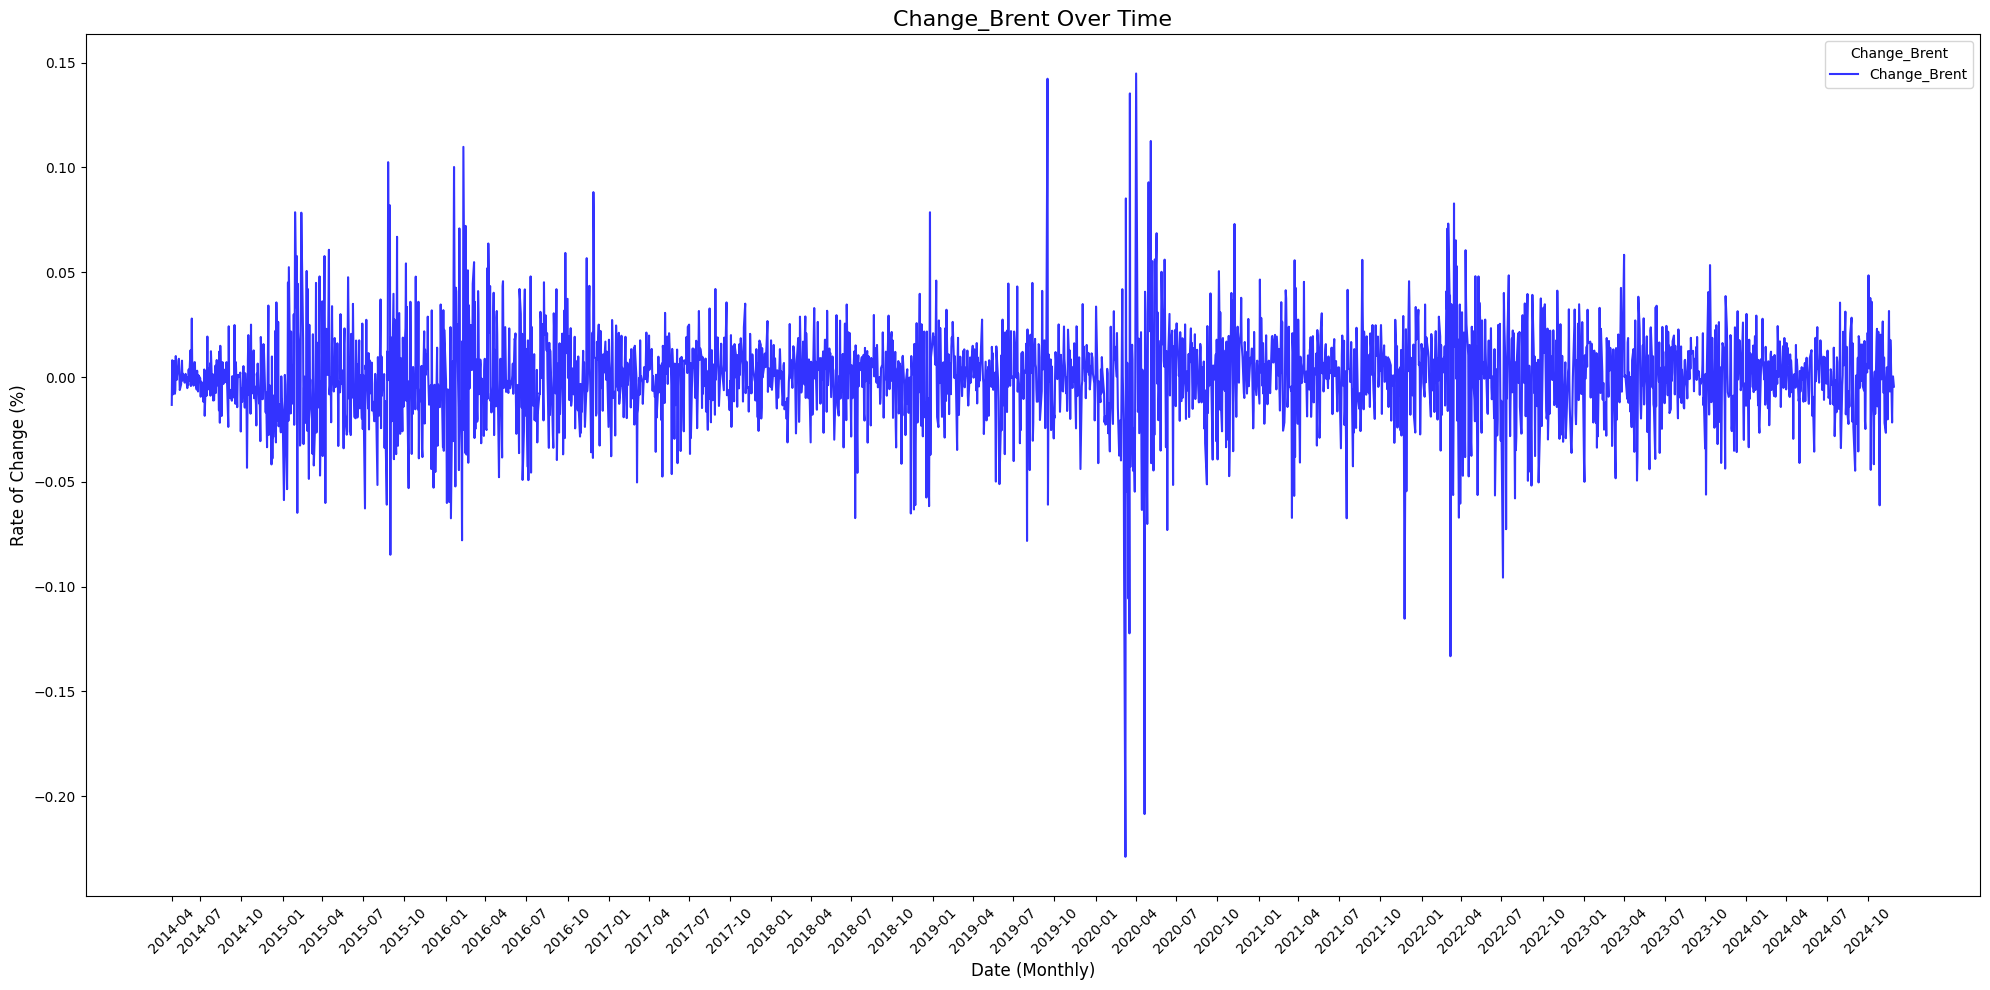

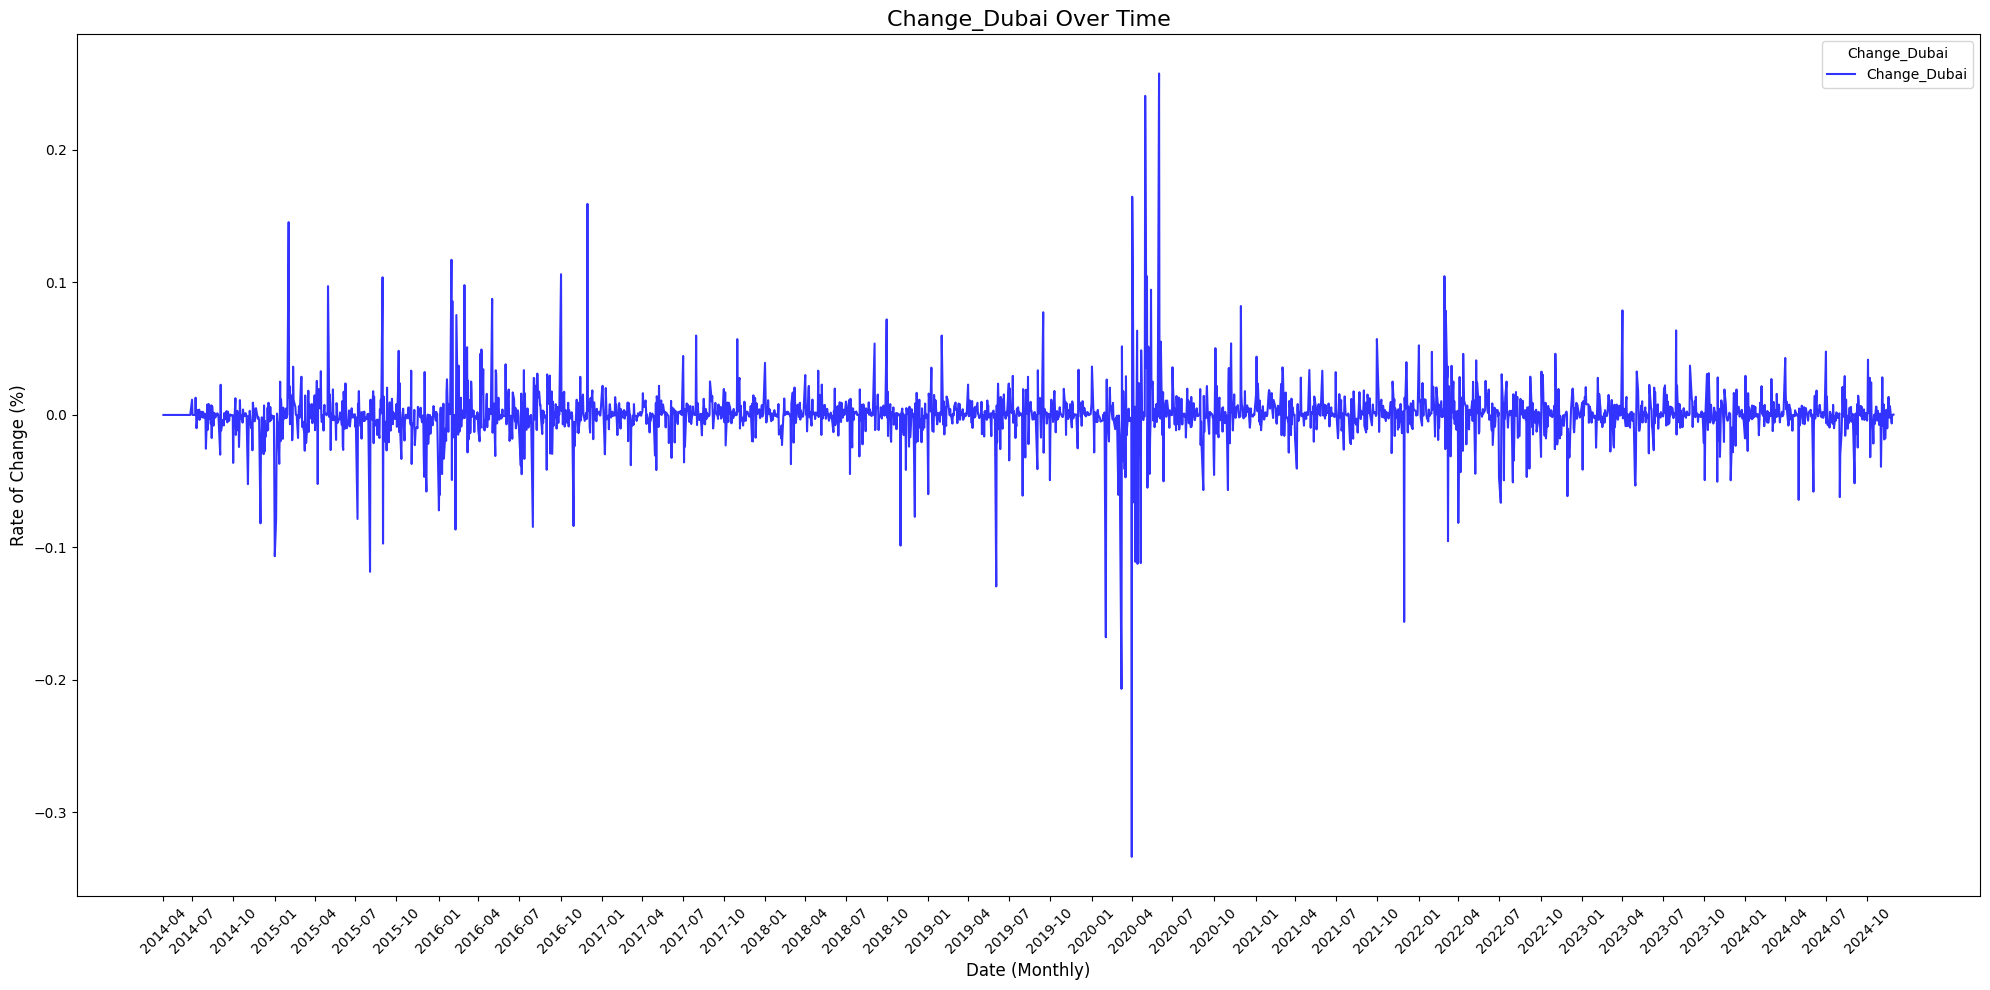

In [9]:
import matplotlib.pyplot as plt

DATA_SINGLE_PLOT = COMBINED_DATA.copy()

# Filter the data to keep only the first date of each month
DATA_SINGLE_PLOT['Month'] = DATA_SINGLE_PLOT['Date'].dt.to_period('M')
monthly_data = DATA_SINGLE_PLOT.drop_duplicates(subset='Month')

# Keep only every 3 months for x-axis ticks
monthly_data = monthly_data[::3]

# Plot each column in a separate figure
for column in ['Change_WTI', 'Change_Brent', 'Change_Dubai']:
    plt.figure(figsize=(20, 10))
    plt.plot(DATA_SINGLE_PLOT['Date'], DATA_SINGLE_PLOT[column], label=column, color='blue', alpha=0.8)
    
    # Format the X-axis to show only the first date of each month
    plt.xticks(monthly_data['Date'], labels=monthly_data['Date'].dt.strftime('%Y-%m'), rotation=45, fontsize=10)

    # Add labels, legend, and title
    plt.xlabel('Date (Monthly)', fontsize=12)
    plt.ylabel('Rate of Change (%)', fontsize=12)
    plt.title(f'{column} Over Time', fontsize=16)
    plt.legend(title=column)
    
    # Show each figure
    plt.tight_layout()
    plt.show()


### PCA

Run Principal Component Analysis on the three oil futures, and plot the first two principal components.

In [10]:
# Combine Change % into a single DataFrame
change_data = (
    COMBINED_DATA
    .drop(columns=['Date'])
)

# Standardize the data
scaler = StandardScaler()
change_data_scaled = scaler.fit_transform(change_data)

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(change_data_scaled)

# Display PCA results
# print("PCA Components:\n", pca_result)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [0.63816692 0.24151734]


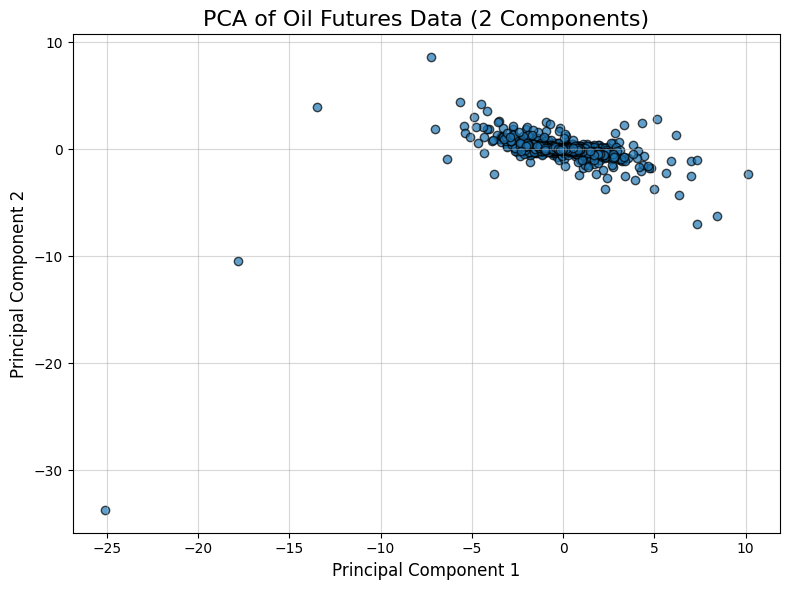

In [11]:
# Plot the PCA components
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7, edgecolors='k')

# Add labels and title
plt.title('PCA of Oil Futures Data (2 Components)', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()


### Pairwise Plots

Plot each pair of futures against each other. Run Kernel Density Estimation on the data to visualize their 'combined distribution'.

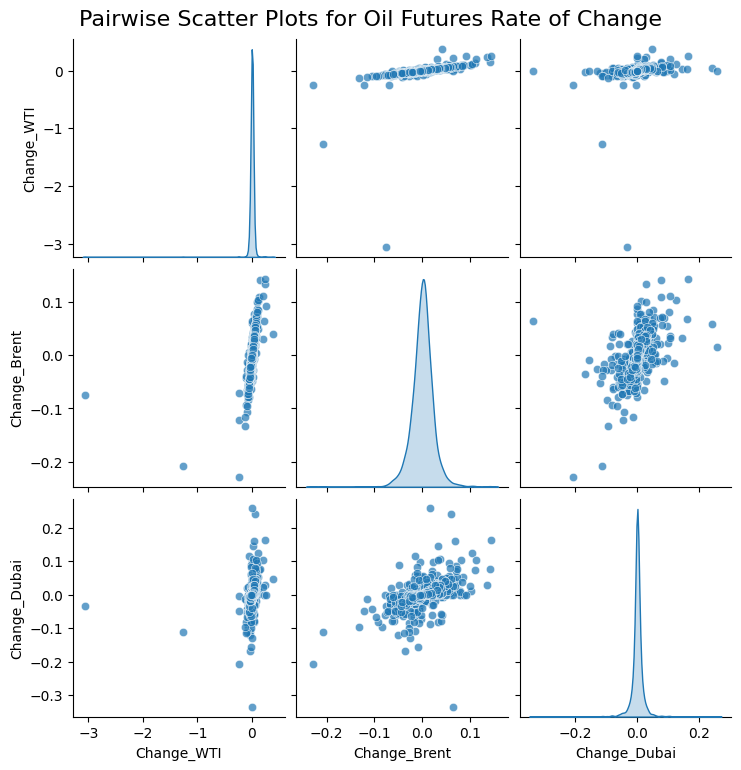

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate pairwise scatter plots
sns.pairplot(
    change_data, 
    vars=['Change_WTI', 'Change_Brent', 'Change_Dubai'], 
    diag_kind='kde', 
    plot_kws={'alpha': 0.7}
)

# Add a title for the overall plot
plt.suptitle("Pairwise Scatter Plots for Oil Futures Rate of Change", y=1.02, fontsize=16)

# Show the plot
plt.show()
